In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
directory=os.getcwd()
df=pd.read_csv(r"C:\Users\aksha\Desktop\well predictor\dataset.csv")

In [6]:
df.head()


,State,District,Station Name,Latitude,Longitude,Site Type,GW,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,Andhra Pradesh,Krishna,A Konduru-New,16.2,81.1,Dug Well,2.260000,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,Andhra Pradesh,Guntur,A Muppalla-DW14,16.3,80.1,Dug Well,2.990000,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,Andhra Pradesh,Guntur,A Muppalla-DW14,16.3,80.1,Dug Well,2.960000,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,Andhra Pradesh,Anantapur,A Roppam-Pz,14.7,77.6,Dug Well,4.630000,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,Andhra Pradesh,Prakasam,Addanki -Pz,15.8,79.9,Dug Well,2.016667,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
print(f"shape of the data={df.shape}")
print()
print("count of output class:")
print(df['Potability'].value_counts())

shape of the data=(3276, 17)

count of output class:
Potability
0    1998
1    1278
Name: count, dtype: int64


<Axes: >

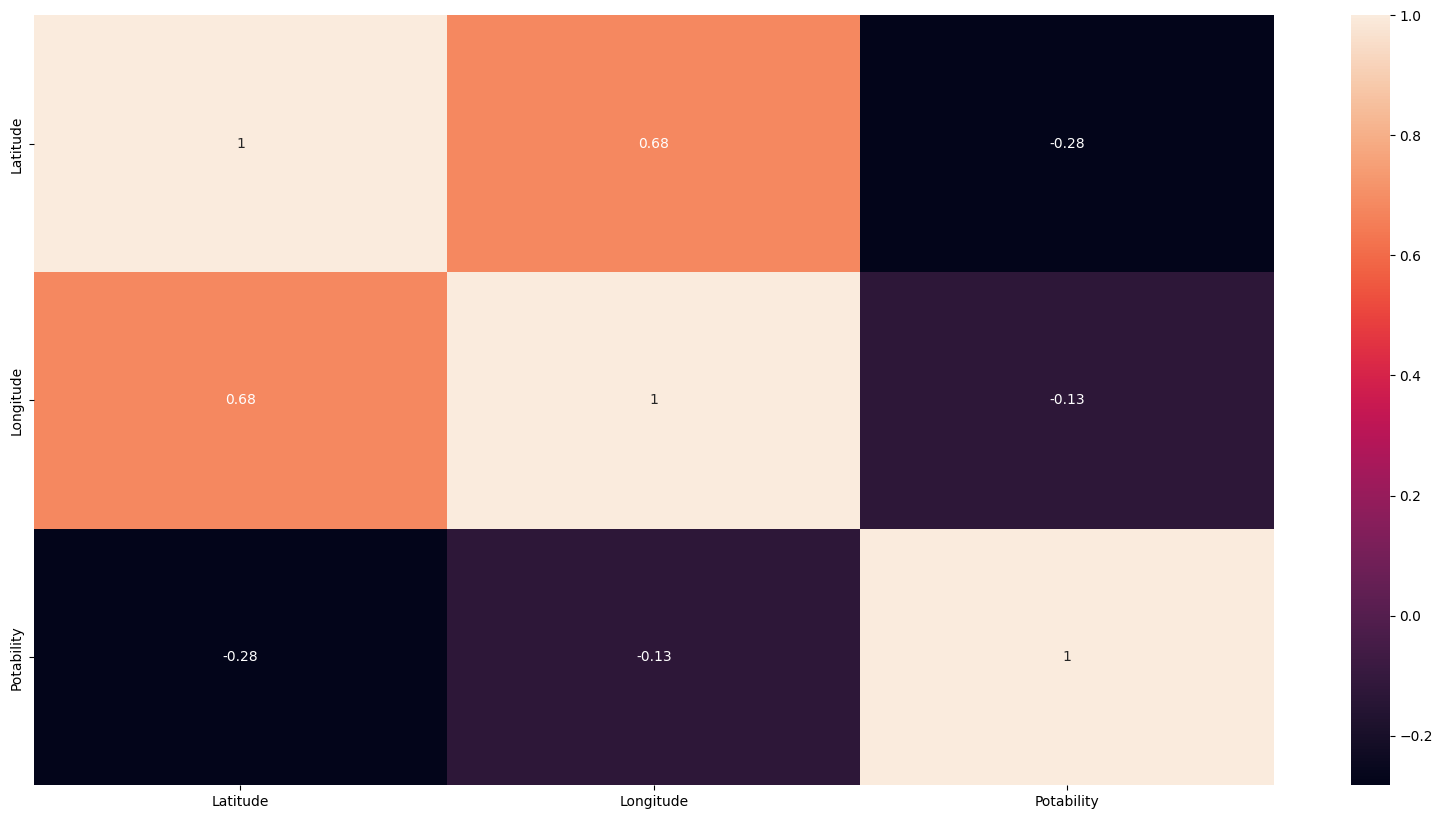

In [8]:
plt.figure(figsize=(20,10))
df = df.drop(['State','District' ,'Station Name',	'Site Type','GW','ph','Hardness',	'Solids','Chloramines',	'Sulfate'	,'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity'], axis=1)
sns.heatmap(df.corr(),annot=True)

In [9]:
df.isnull().sum()

Latitude      0
Longitude     0
Potability    0
dtype: int64

In [10]:
df.Latitude.unique()

array([16.2, 16.3, 14.7, 15.8, 17. , 14.4, 14.5, 15.6, 15.3, 15.4, 18.1,
       15.2, 16.8, 17.7, 16.6, 15.9, 18.2, 14.6, 18.4, 16.5, 14.3, 13.9,
       17.6, 17.9, 17.8, 17.1, 16.4, 18.7, 18.3, 16.7, 16. ])

<Axes: ylabel='Latitude'>

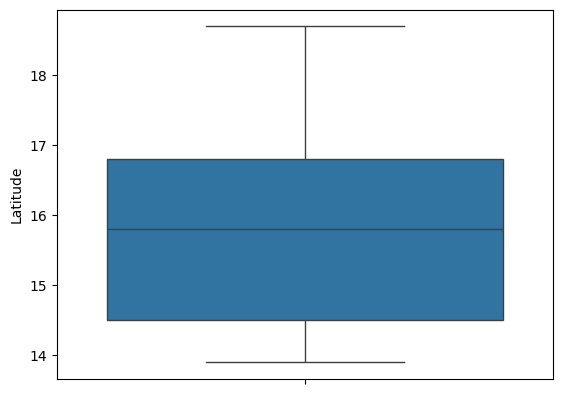

In [11]:
sns.boxplot(df['Latitude'])

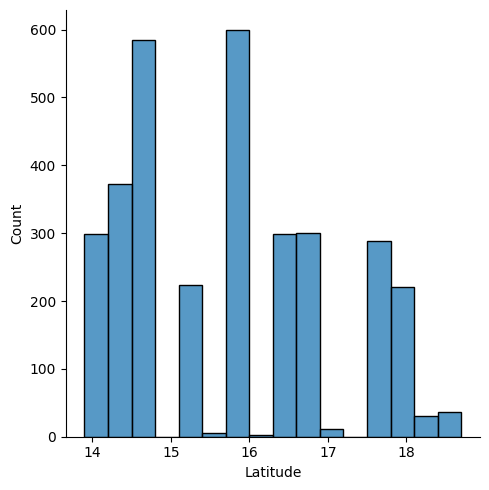

In [12]:
sns.displot(x=df['Latitude'])

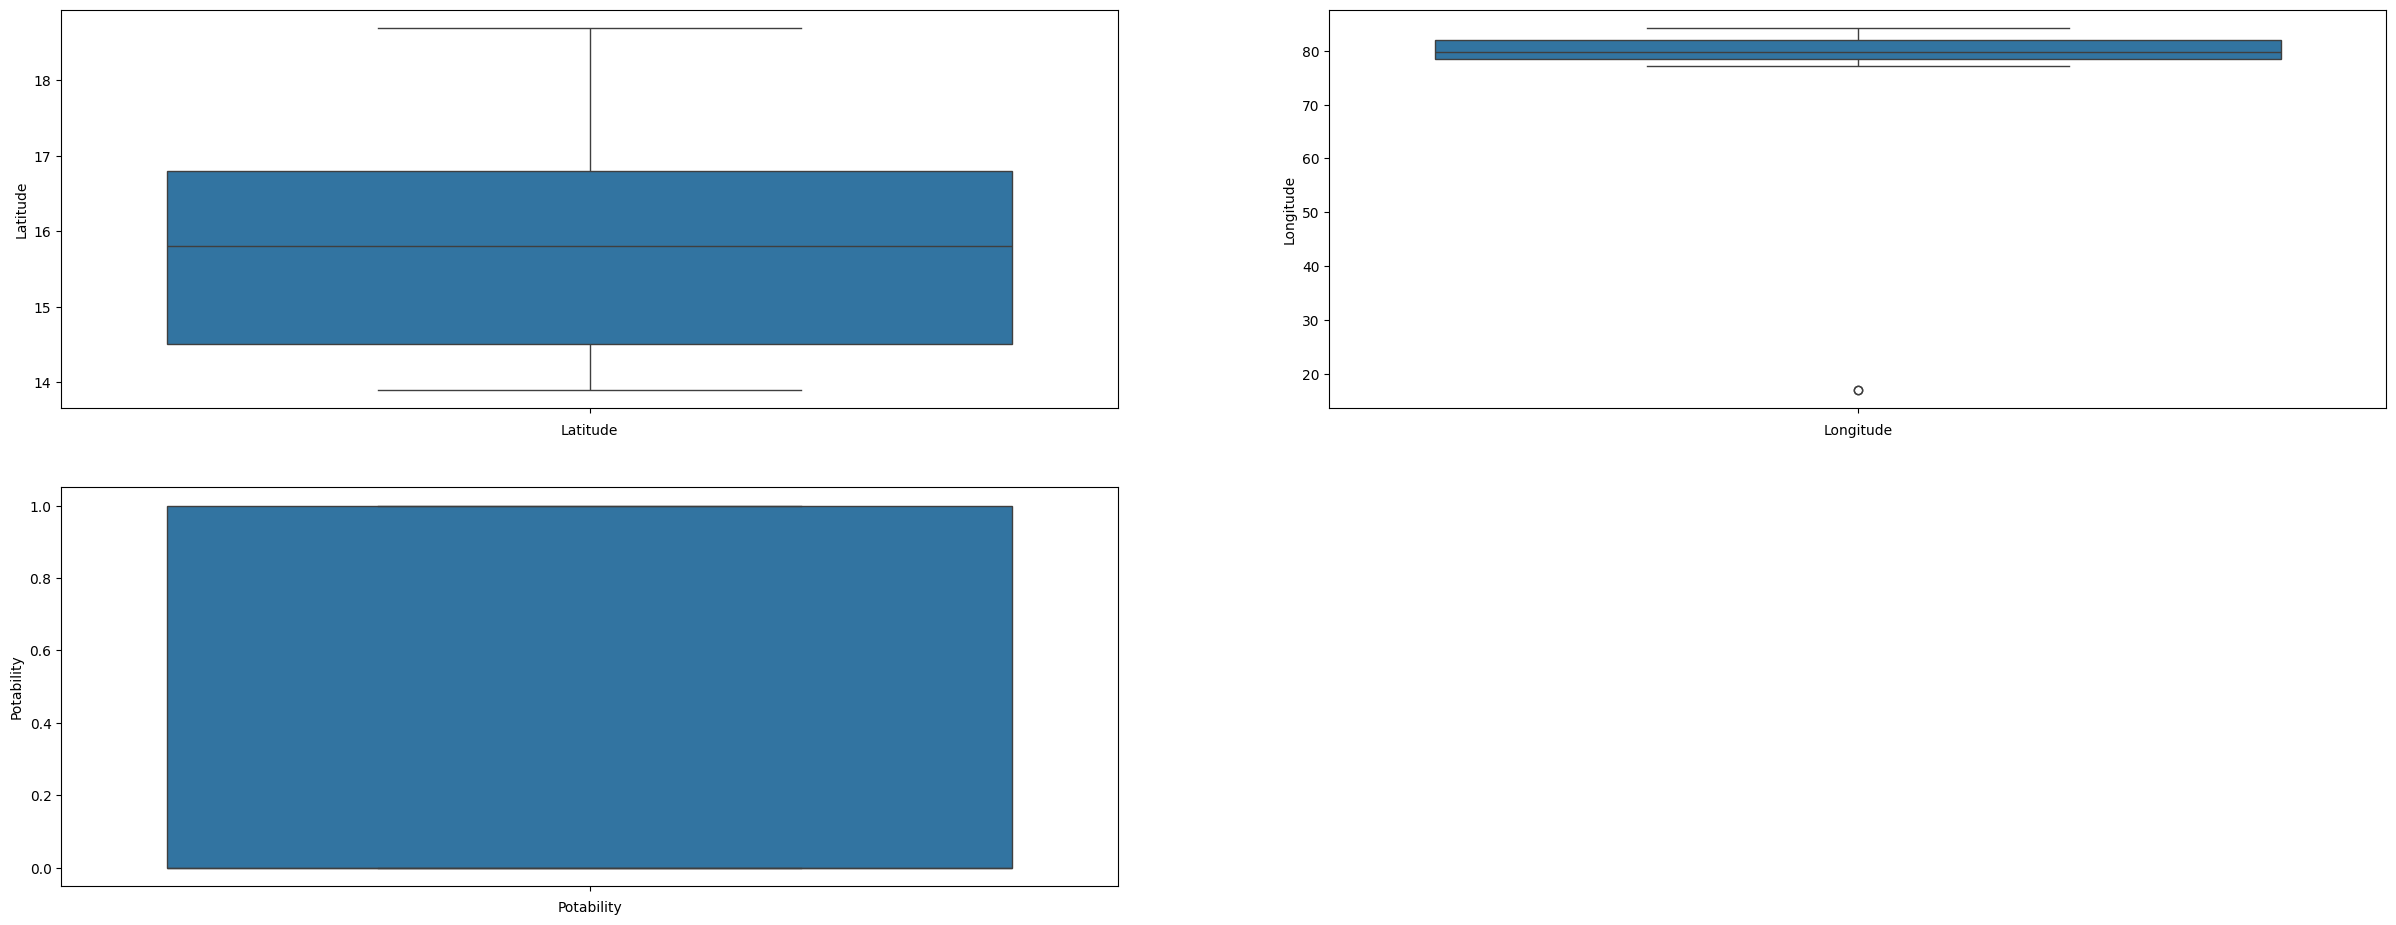

In [13]:
plt.figure(figsize=(30,30))
j=1
for i in df.columns[:10]:
  plt.subplot(5,2,j)
  sns.boxplot(df[i])
  plt.xlabel(i)
  j+=1

In [14]:
df['Longitude'].value_counts()

Longitude
79.9    315
78.4    300
79.3    297
77.6    295
81.5    292
82.0    291
77.5    291
83.2    288
78.7    274
83.4    256
79.8    249
80.6     37
82.9     27
77.7      6
82.2      6
79.1      5
80.3      4
79.0      4
80.1      4
81.7      4
82.4      3
81.4      3
81.1      3
79.7      2
77.1      2
17.0      2
81.0      2
78.6      2
80.2      2
80.9      2
81.2      2
84.2      1
83.0      1
83.9      1
84.3      1
83.7      1
82.8      1
Name: count, dtype: int64

In [15]:
m=list(df.columns)

In [16]:
m

['Latitude', 'Longitude', 'Potability']

In [17]:
#m=m[0:9]
#m.remove('ph')
#m.remove('Hardness')
#m.remove('Solids')


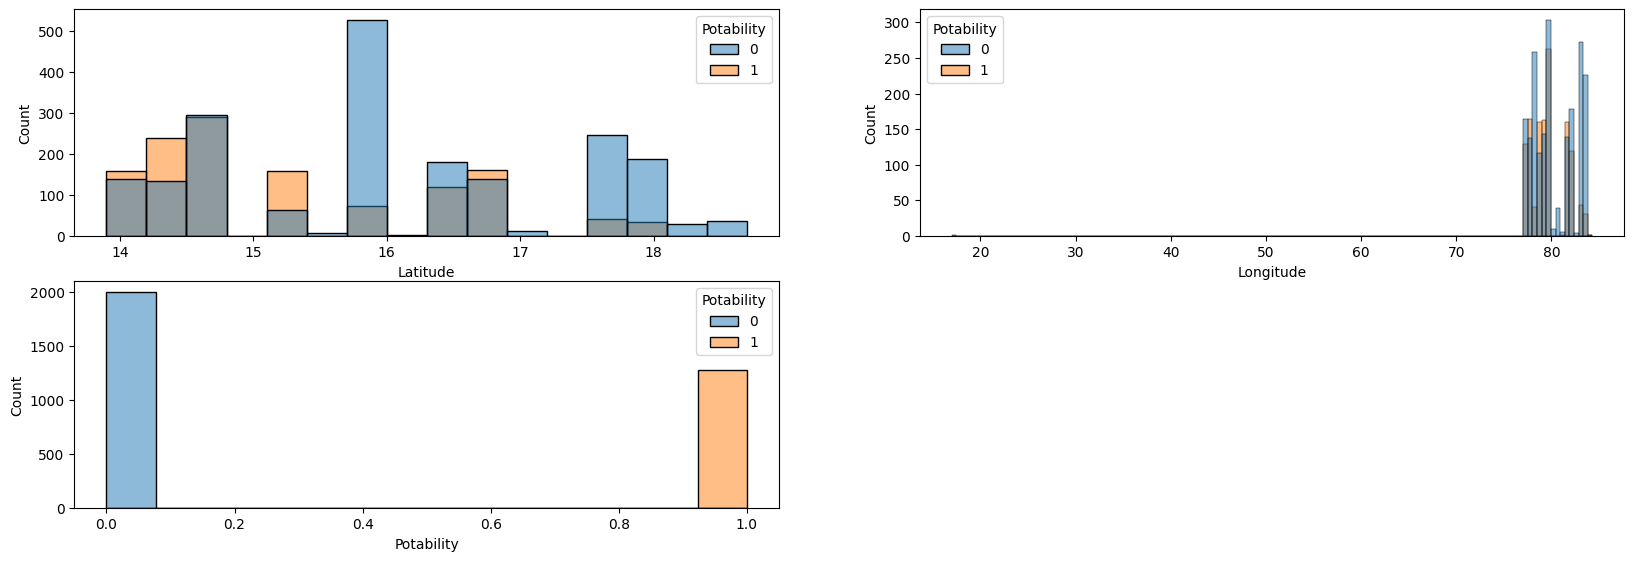

In [18]:
plt.figure(figsize=(20,10))
for i in range(len(m)):
  plt.subplot(3,2,i+1)
  sns.histplot(data=df,x=m[i],hue='Potability')
  plt.xlabel(m[i])

In [19]:
df


,Latitude,Longitude,Potability
0,16.2,81.1,0
1,16.3,80.1,0
2,16.3,80.1,0
3,14.7,77.6,0
4,15.8,79.9,0
...,...,...,...
3271,15.3,79.8,1
3272,15.3,79.8,1
3273,15.3,79.8,1
3274,15.3,79.8,1


In [20]:
X=df.drop('Potability',axis=1)

In [21]:
Y=df['Potability']

In [22]:
X.shape

(3276, 2)

In [23]:
Y.shape

(3276,)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn. naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
X.head()

,Latitude,Longitude
0,16.2,81.1
1,16.3,80.1
2,16.3,80.1
3,14.7,77.6
4,15.8,79.9


In [26]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.1)

In [28]:
smt=SMOTE()

In [29]:

from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


imputer.fit(X_train)


X_train = imputer.transform(X_train)


X_train, Y_train = smt.fit_resample(X_train, Y_train)

In [30]:
Y_train.value_counts()

Potability
0    1794
1    1794
Name: count, dtype: int64

In [31]:
std=StandardScaler()
X_test = imputer.transform(X_test)
X_train, X_test = X_train[:, :11], X_test[:, :11]
X_train_sc=std.fit_transform(X_train)
X_test_sc=std.transform(X_test)

In [32]:
models={"Random_Forest":RandomForestClassifier(),"NB":GaussianNB(),"Logistic":LogisticRegression(),"DTree":DecisionTreeClassifier(),"SVM":SVC()}

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_sc = imputer.fit_transform(X_train_sc)
X_test_sc = imputer.transform(X_test_sc)
def model_training(X_t, Y_t, X_te, Y_te, models):
    evaluate = {}
    test = {}

    for i in models.values():
        m = i
        m.fit(X_t, Y_t)
        y_pred = m.predict(X_te)
        y_pred1 = m.predict(X_t)

        evaluate[str(i)] = accuracy_score(Y_te, y_pred)
        test[str(i)] = accuracy_score(Y_t, y_pred1)

    return evaluate, test

accuracy_scores, trained_models = model_training(X_train_sc, Y_train, X_test_sc, Y_test, models)

In [34]:
data = sorted(accuracy_scores.items(),key=lambda x:(x[1]))
data=dict(data)

In [35]:
X=list(data.keys())
Y=list(data.values())

<BarContainer object of 5 artists>

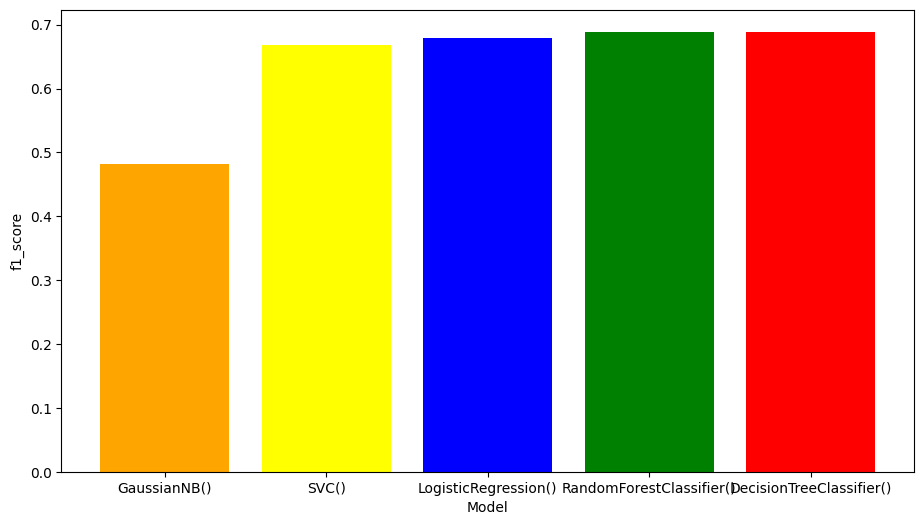

In [36]:
plt.figure(figsize=(11,6))
plt.xlabel("Model")
plt.ylabel("f1_score")
plt. bar(X, Y, color=('ORANGE', 'YELLOW', 'BLUE', 'GREEN', 'RED' ))

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:

param={
    "n_estimators": [100, 200, 300, 400],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": ['sqrt', 'log2', None],
    "bootstrap": [True, False]
}


In [39]:
rfc=RandomForestClassifier(n_estimators=170,random_state=42,max_depth=5,bootstrap=False)

In [40]:
rfc.fit(X_train,Y_train)
pickle.dump(rfc,open('model.pkl','wb'))

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_test = imputer.fit_transform(X_test)
y_pred=rfc.predict(X_test)
y_pred1=rfc.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [42]:
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(classification_report(Y_train,y_pred1))

0.6890243902439024
              precision    recall  f1-score   support

           0       0.92      0.55      0.69       204
           1       0.55      0.92      0.69       124

    accuracy                           0.69       328
   macro avg       0.74      0.73      0.69       328
weighted avg       0.78      0.69      0.69       328

              precision    recall  f1-score   support

           0       0.85      0.54      0.66      1794
           1       0.66      0.90      0.76      1794

    accuracy                           0.72      3588
   macro avg       0.75      0.72      0.71      3588
weighted avg       0.75      0.72      0.71      3588



In [43]:
cm=confusion_matrix(Y_test,y_pred)

In [44]:
cm

array([[112,  92],
       [ 10, 114]], dtype=int64)

In [45]:
sv=SVC(C=1,kernel='rbf',gamma='scale',probability=True,random_state=42)
sv.fit(X_train_sc,Y_train)

SVC(C=1, probability=True, random_state=42)

In [46]:
y_p=sv.predict(X_test_sc)

In [47]:
print(classification_report(Y_test,y_p))

              precision    recall  f1-score   support

           0       0.91      0.52      0.66       204
           1       0.54      0.91      0.67       124

    accuracy                           0.67       328
   macro avg       0.72      0.72      0.67       328
weighted avg       0.77      0.67      0.67       328



In [48]:
sv.predict_proba(X_train_sc)

array([[0.76778307, 0.23221693],
       [0.35588181, 0.64411819],
       [0.35600309, 0.64399691],
       ...,
       [0.35597888, 0.64402112],
       [0.35588181, 0.64411819],
       [0.41454439, 0.58545561]])

In [52]:
import pickle

In [53]:
dt=DecisionTreeClassifier(max_depth=6,criterion="gini",random_state=42)

In [54]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [55]:
y_pred=dt.predict(X_test_sc)

In [56]:
print(accuracy_score(Y_test,y_pred))

0.3780487804878049


In [57]:
print(classification_report(Y_train,dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.54      0.66      1794
           1       0.66      0.90      0.76      1794

    accuracy                           0.72      3588
   macro avg       0.75      0.72      0.71      3588
weighted avg       0.75      0.72      0.71      3588



In [58]:
from sklearn import tree

[Text(0.3958333333333333, 0.9285714285714286, 'x[0] <= 15.35\ngini = 0.5\nsamples = 3588\nvalue = [1794, 1794]'),
 Text(0.2, 0.7857142857142857, 'x[1] <= 79.75\ngini = 0.44\nsamples = 1735\nvalue = [566, 1169]'),
 Text(0.13333333333333333, 0.6428571428571429, 'x[0] <= 14.65\ngini = 0.468\nsamples = 1360\nvalue = [509, 851]'),
 Text(0.1, 0.5, 'x[1] <= 77.55\ngini = 0.465\nsamples = 1345\nvalue = [494.0, 851.0]'),
 Text(0.06666666666666667, 0.35714285714285715, 'gini = 0.497\nsamples = 325\nvalue = [151, 174]'),
 Text(0.13333333333333333, 0.35714285714285715, 'x[0] <= 14.305\ngini = 0.446\nsamples = 1020\nvalue = [343, 677]'),
 Text(0.06666666666666667, 0.21428571428571427, 'x[1] <= 79.5\ngini = 0.459\nsamples = 692\nvalue = [247.0, 445.0]'),
 Text(0.03333333333333333, 0.07142857142857142, 'gini = 0.458\nsamples = 690\nvalue = [245.0, 445.0]'),
 Text(0.1, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2, 0.21428571428571427, 'x[1] <= 78.2\ngini = 0.414\nsamples 

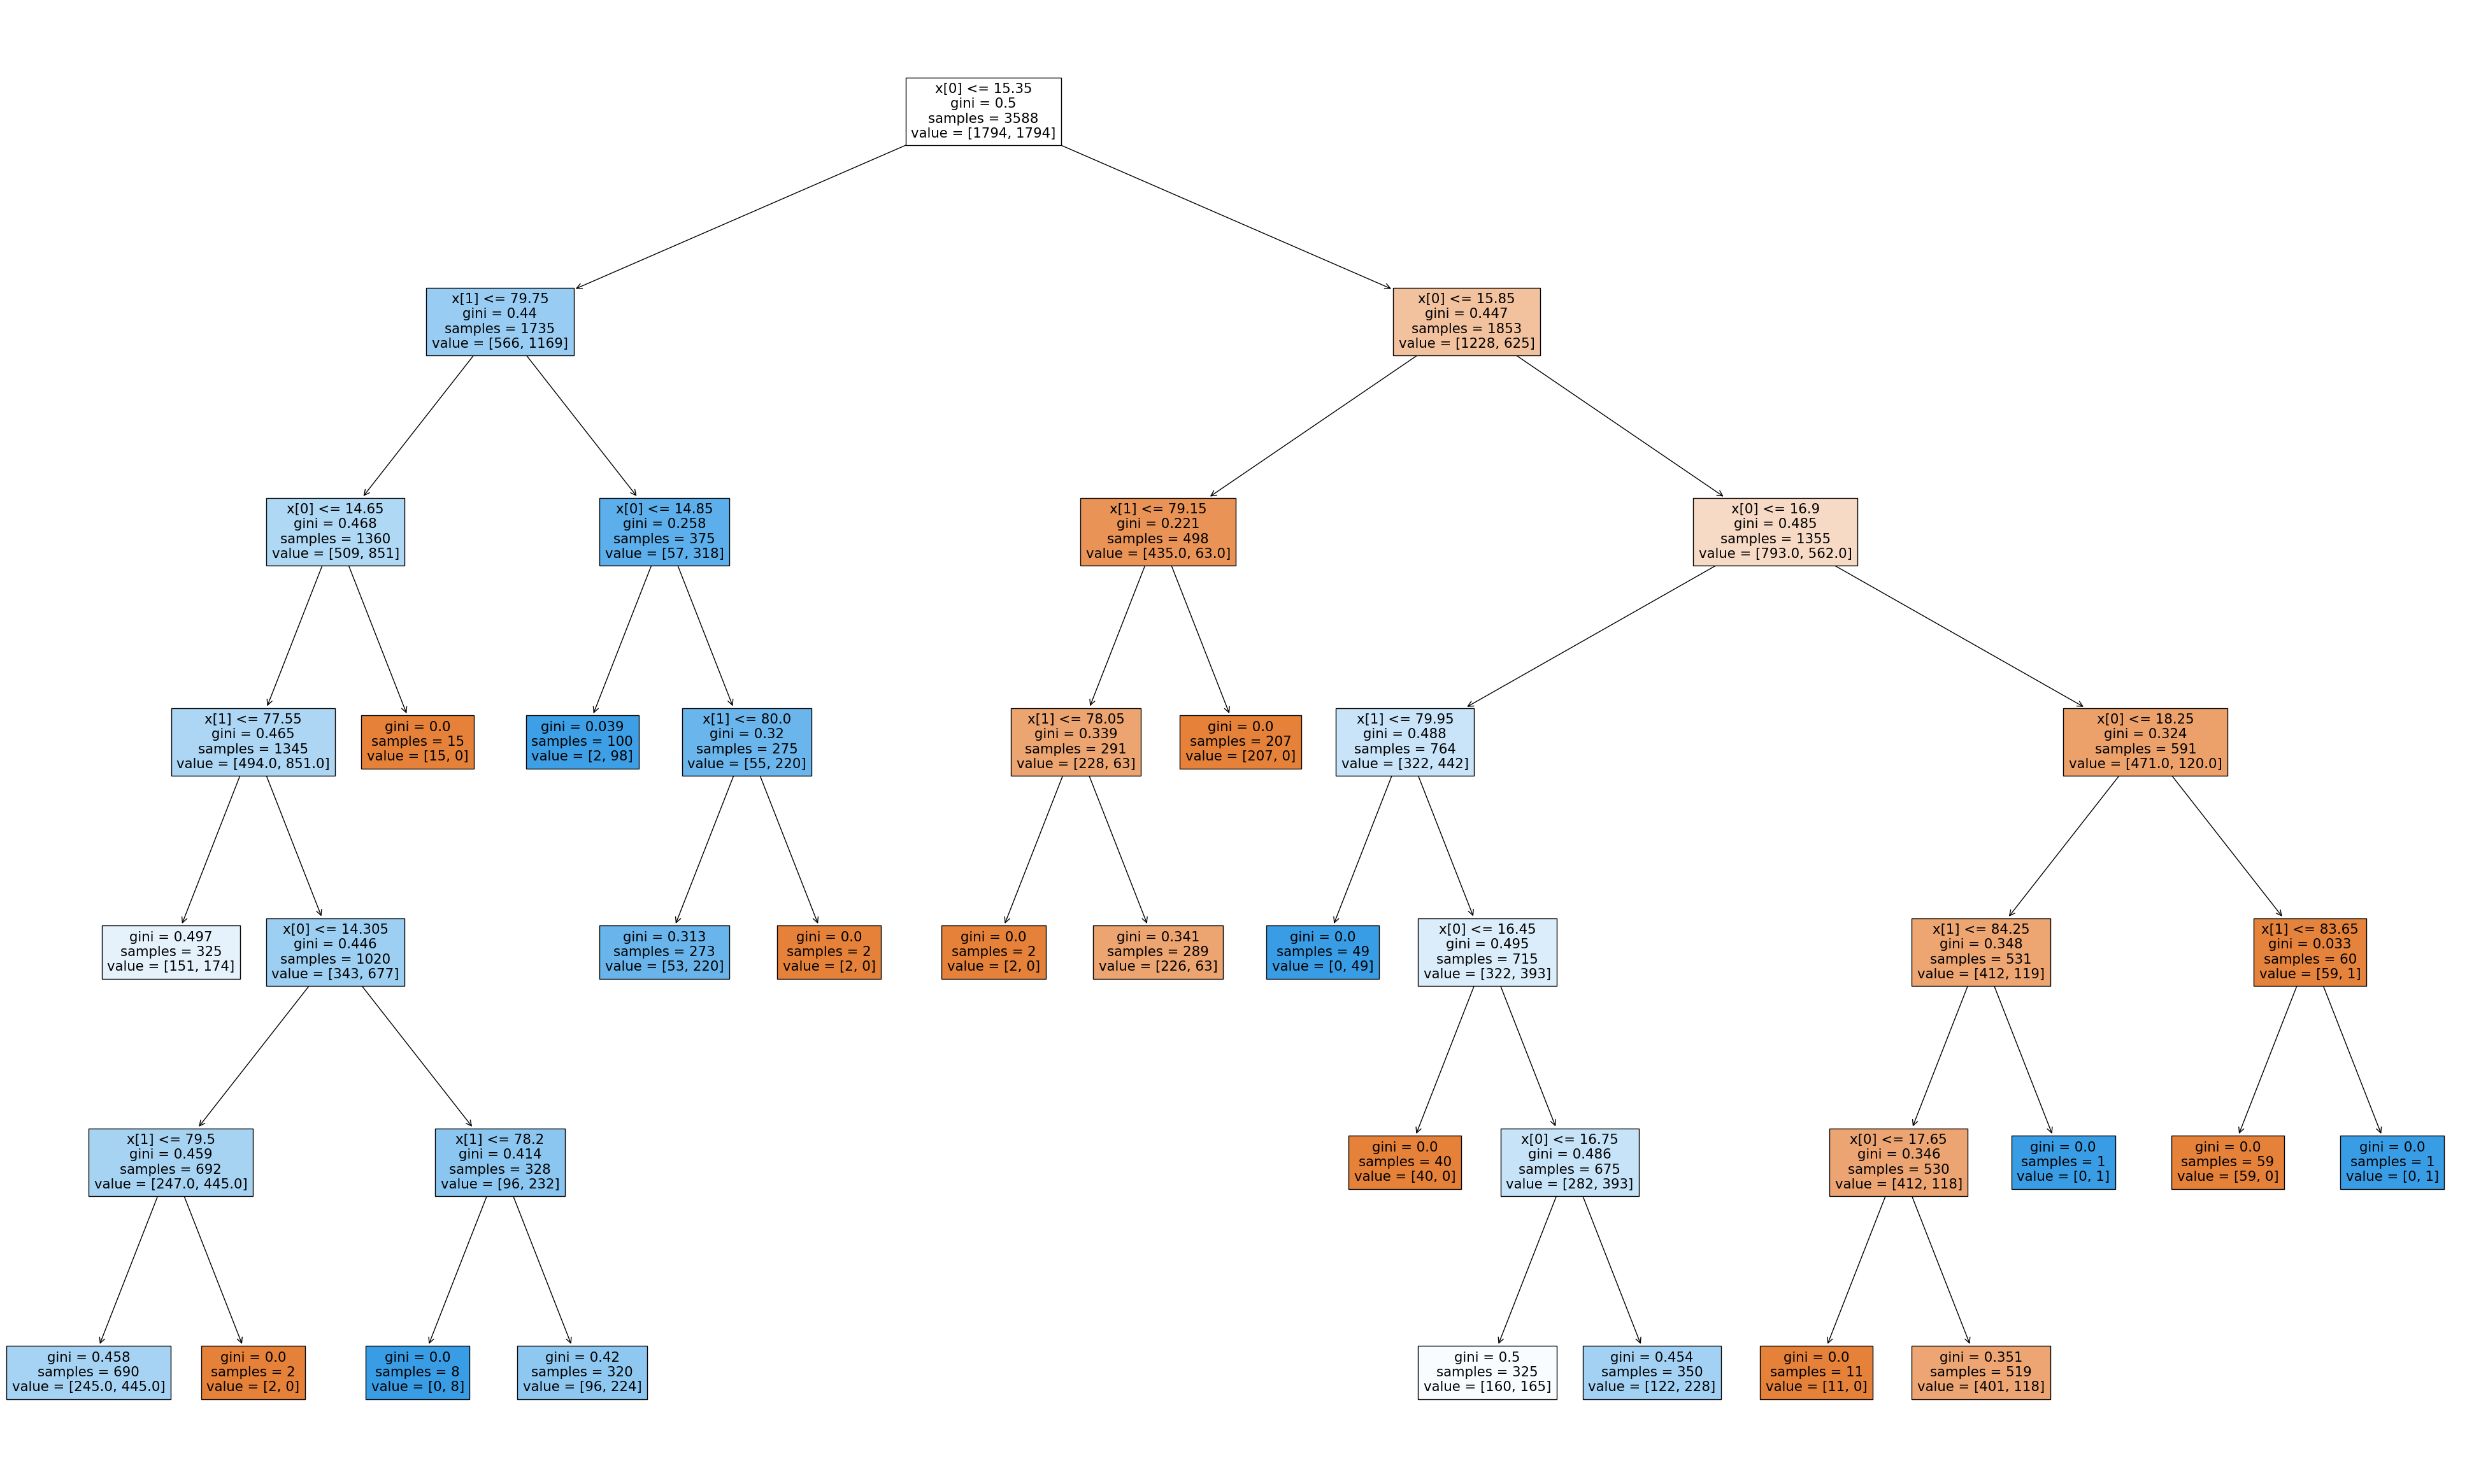

In [59]:
plt.figure(figsize=(50,30))
tree.plot_tree(dt,filled=True)

In [60]:
input=np.array([[16.1,82.1]])
prediction=rfc.predict(input)
print(prediction)


[0]


In [61]:
import pickle
with open('GWQ.pkl','wb') as f:
  pickle.dump(rfc,f)